In [ ]:
# Sup Classification

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [5]:
#Ejemplo Sklearn

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])


clf.score(X, y)

C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9733333333333334

In [2]:
churn = pd.read_csv('data/churn.csv')

In [4]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MonthLevel', 'TotalLevel', 'TenureLevel', 'ChurnBinary'],
      dtype='object')

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
MonthLevel          7032 non-nul

In [9]:
churn.drop('customerID', axis = 1, inplace = True)

In [12]:
churn.drop('Churn', axis = 1, inplace = True)

In [11]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthLevel,TotalLevel,TenureLevel,ChurnBinary
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low,Very Low,New,0.0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,Low,Moderate,Loyal,0.0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Low,Very Low,New,1.0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Low,Moderate,Loyal,0.0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moderate,Very Low,New,1.0


In [10]:
churn['Churn']=  churn['Churn'].astype('int')

ValueError: invalid literal for int() with base 10: 'No'

In [13]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'MonthLevel', 'TotalLevel',
       'TenureLevel', 'ChurnBinary'],
      dtype='object')

In [ ]:
#Gender, "partner" depend,phone, churn binary, totalcharges

In [14]:
churn_c = churn[['gender','Partner','Dependents','ChurnBinary','TotalCharges']]

In [22]:
churn_dum = pd.get_dummies(churn_c)
churn_dum

,ChurnBinary,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes
0,0.0,29.85,1,0,0,1,1,0
1,0.0,1889.50,0,1,1,0,1,0
2,1.0,108.15,0,1,1,0,1,0
3,0.0,1840.75,0,1,1,0,1,0
4,1.0,151.65,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
7027,0.0,1990.50,0,1,0,1,0,1
7028,0.0,7362.90,1,0,0,1,0,1
7029,0.0,346.45,1,0,0,1,0,1
7030,1.0,306.60,0,1,0,1,1,0


In [51]:
y = churn_dum.pop('ChurnBinary')

In [52]:
X = churn_dum.copy()

In [21]:
clf = LogisticRegression(random_state=0).fit(X, y)
clf.predict(X)

clf.score(X, y)

0.7342150170648464

In [23]:
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn import tree

In [32]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [30]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,x_test,y_train, y_test = train_test_split(iris.data,iris.target)

In [39]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(x_test)

In [44]:
y_pred

array([1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 1, 1])

In [45]:
y_test

array([1, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 2])

In [46]:
clf.score(x_test,y_test)

0.9210526315789473

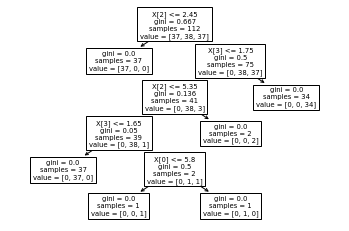

In [47]:
tree.plot_tree(clf)

plt.show();

In [48]:
from sklearn.metrics import confusion_matrix

In [50]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)


0.9210526315789473

In [49]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 11]], dtype=int64)

In [ ]:
#aquellos que son positivos en la realidad y en la prediccion son positivos (verdaderos - positivos)
#aquellos que son negativos en la realidad y en la prediccion son positivos (falsos - positivos)
#aquellos que son positivos en la realidad y en la prediccion son negativos (falsos - negativos)
#aquellos que son negativos en la realidad y en la prediccion son negativos (Verdaderos - negativos)

In [58]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [59]:
X_train,x_test,y_train, y_test = train_test_split(X,y)

In [61]:
clf = GaussianNB()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(x_test)

clf.score(x_test,y_test)

0.6359499431171786

In [62]:
clf = MultinomialNB()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(x_test)

clf.score(x_test,y_test)

0.6706484641638225

In [63]:
clf = SVC()

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(x_test)

clf.score(x_test,y_test)

0.7366325369738339

In [88]:
def modeling_testing(lista_modelos,data, target):
    X_train,x_test,y_train, y_test = train_test_split(data.loc[:, data.columns != target],data[target])
    
    for i in lista_modelos:
        modelo = i()
        modelo.fit(X_train,y_train)
        train_score = modelo.score(X_train,y_train)
        test_score = modelo.score(x_test, y_test)
        print('Modelo :', str(i).split(sep = '.')[-1])
        print('Train_score :', train_score,'\nTest_Score:' ,test_score,'\n')
        

In [89]:
lista_m= [SVC,MultinomialNB,GaussianNB, DecisionTreeClassifier,LogisticRegression]

["<class 'sklearn", 'svm', '_classes', "SVC'>"]

In [90]:
from sklearn.datasets import load_diabetes, load_wine

In [91]:
wine = pd.DataFrame(load_wine().data, columns = load_wine().feature_names )
wine['target'] = load_wine().target
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [92]:
modeling_testing(lista_m,wine,'target')

Modelo : SVC'>
Train_score : 0.6917293233082706 
Test_Score: 0.6222222222222222 

Modelo : MultinomialNB'>
Train_score : 0.8872180451127819 
Test_Score: 0.8666666666666667 

Modelo : GaussianNB'>
Train_score : 0.9849624060150376 
Test_Score: 0.9555555555555556 

Modelo : DecisionTreeClassifier'>
Train_score : 1.0 
Test_Score: 0.8666666666666667 

Modelo : LogisticRegression'>
Train_score : 0.9774436090225563 
Test_Score: 0.9555555555555556 



C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Ensemble Models


### Bagging  -  Boosting


![](data/boost.png)

In [96]:
from sklearn.ensemble import BaggingClassifier

In [97]:
clf = BaggingClassifier(base_estimator= SVC(),
                       n_estimators=10, random_state = 0)

In [98]:
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
clf.score(x_test,y_test)

0.7366325369738339

In [100]:
clf = BaggingClassifier(base_estimator= SVC(),
                       n_estimators=20, random_state = 0)
clf.fit(X_train, y_train)
clf.score(x_test,y_test)

0.7366325369738339

# Boosting 

In [107]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier as XGBC
from catboost import CatBoostClassifier as CTC
from lightgbm import LGBMClassifier as LGBMC

In [108]:
lista_m= [SVC,MultinomialNB,GaussianNB, DecisionTreeClassifier,LogisticRegression,GBC, XGBC, CTC,LGBMC]

In [109]:
modeling_testing(lista_m,wine,'target')

Modelo : SVC'>
Train_score : 0.6917293233082706 
Test_Score: 0.7555555555555555 

Modelo : MultinomialNB'>
Train_score : 0.8421052631578947 
Test_Score: 0.8222222222222222 

Modelo : GaussianNB'>
Train_score : 0.9849624060150376 
Test_Score: 0.9555555555555556 

Modelo : DecisionTreeClassifier'>
Train_score : 1.0 
Test_Score: 0.8666666666666667 

Modelo : LogisticRegression'>
Train_score : 0.9699248120300752 
Test_Score: 0.9777777777777777 



C:\Users\GralG\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Modelo : GradientBoostingClassifier'>
Train_score : 1.0 
Test_Score: 0.9777777777777777 

Modelo : XGBClassifier'>
Train_score : 1.0 
Test_Score: 0.9777777777777777 

Learning rate set to 0.07139
0:	learn: 1.0340520	total: 161ms	remaining: 2m 40s
1:	learn: 0.9725097	total: 170ms	remaining: 1m 24s
2:	learn: 0.9197285	total: 173ms	remaining: 57.3s
3:	learn: 0.8715388	total: 175ms	remaining: 43.7s
4:	learn: 0.8191462	total: 177ms	remaining: 35.2s
5:	learn: 0.7765476	total: 181ms	remaining: 30s
6:	learn: 0.7372421	total: 184ms	remaining: 26.1s
7:	learn: 0.7056903	total: 186ms	remaining: 23.1s
8:	learn: 0.6726657	total: 188ms	remaining: 20.7s
9:	learn: 0.6475027	total: 189ms	remaining: 18.8s
10:	learn: 0.6199041	total: 191ms	remaining: 17.2s
11:	learn: 0.5983898	total: 194ms	remaining: 15.9s
12:	learn: 0.5691804	total: 196ms	remaining: 14.9s
13:	learn: 0.5440823	total: 198ms	remaining: 13.9s
14:	learn: 0.5205939	total: 200ms	remaining: 13.1s
15:	learn: 0.4996920	total: 202ms	remaining: 12.4

248:	learn: 0.0206906	total: 637ms	remaining: 1.92s
249:	learn: 0.0206086	total: 639ms	remaining: 1.92s
250:	learn: 0.0204601	total: 642ms	remaining: 1.92s
251:	learn: 0.0203758	total: 645ms	remaining: 1.91s
252:	learn: 0.0202860	total: 647ms	remaining: 1.91s
253:	learn: 0.0201826	total: 649ms	remaining: 1.91s
254:	learn: 0.0201031	total: 650ms	remaining: 1.9s
255:	learn: 0.0199480	total: 652ms	remaining: 1.89s
256:	learn: 0.0198476	total: 654ms	remaining: 1.89s
257:	learn: 0.0197503	total: 655ms	remaining: 1.88s
258:	learn: 0.0196091	total: 657ms	remaining: 1.88s
259:	learn: 0.0195133	total: 658ms	remaining: 1.87s
260:	learn: 0.0193998	total: 659ms	remaining: 1.87s
261:	learn: 0.0193159	total: 661ms	remaining: 1.86s
262:	learn: 0.0191753	total: 662ms	remaining: 1.86s
263:	learn: 0.0190692	total: 664ms	remaining: 1.85s
264:	learn: 0.0189562	total: 665ms	remaining: 1.84s
265:	learn: 0.0188647	total: 666ms	remaining: 1.84s
266:	learn: 0.0187554	total: 668ms	remaining: 1.83s
267:	learn: 0

423:	learn: 0.0107985	total: 948ms	remaining: 1.29s
424:	learn: 0.0107670	total: 950ms	remaining: 1.28s
425:	learn: 0.0107345	total: 953ms	remaining: 1.28s
426:	learn: 0.0107143	total: 956ms	remaining: 1.28s
427:	learn: 0.0106762	total: 958ms	remaining: 1.28s
428:	learn: 0.0106445	total: 960ms	remaining: 1.28s
429:	learn: 0.0106202	total: 961ms	remaining: 1.27s
430:	learn: 0.0105892	total: 963ms	remaining: 1.27s
431:	learn: 0.0105552	total: 965ms	remaining: 1.27s
432:	learn: 0.0105251	total: 966ms	remaining: 1.26s
433:	learn: 0.0104977	total: 967ms	remaining: 1.26s
434:	learn: 0.0104707	total: 969ms	remaining: 1.26s
435:	learn: 0.0104427	total: 970ms	remaining: 1.25s
436:	learn: 0.0104099	total: 972ms	remaining: 1.25s
437:	learn: 0.0103747	total: 973ms	remaining: 1.25s
438:	learn: 0.0103508	total: 975ms	remaining: 1.25s
439:	learn: 0.0103302	total: 976ms	remaining: 1.24s
440:	learn: 0.0103066	total: 979ms	remaining: 1.24s
441:	learn: 0.0102717	total: 981ms	remaining: 1.24s
442:	learn: 

589:	learn: 0.0073826	total: 1.26s	remaining: 877ms
590:	learn: 0.0073646	total: 1.26s	remaining: 875ms
591:	learn: 0.0073480	total: 1.27s	remaining: 873ms
592:	learn: 0.0073307	total: 1.27s	remaining: 870ms
593:	learn: 0.0073119	total: 1.27s	remaining: 870ms
594:	learn: 0.0073016	total: 1.27s	remaining: 868ms
595:	learn: 0.0072883	total: 1.28s	remaining: 865ms
596:	learn: 0.0072757	total: 1.28s	remaining: 862ms
597:	learn: 0.0072603	total: 1.28s	remaining: 860ms
598:	learn: 0.0072502	total: 1.28s	remaining: 857ms
599:	learn: 0.0072375	total: 1.28s	remaining: 855ms
600:	learn: 0.0072277	total: 1.28s	remaining: 853ms
601:	learn: 0.0072166	total: 1.29s	remaining: 852ms
602:	learn: 0.0071999	total: 1.29s	remaining: 851ms
603:	learn: 0.0071821	total: 1.3s	remaining: 850ms
604:	learn: 0.0071715	total: 1.3s	remaining: 849ms
605:	learn: 0.0071611	total: 1.3s	remaining: 847ms
606:	learn: 0.0071462	total: 1.3s	remaining: 844ms
607:	learn: 0.0071316	total: 1.3s	remaining: 842ms
608:	learn: 0.007

771:	learn: 0.0054684	total: 1.58s	remaining: 467ms
772:	learn: 0.0054572	total: 1.58s	remaining: 465ms
773:	learn: 0.0054521	total: 1.58s	remaining: 462ms
774:	learn: 0.0054407	total: 1.58s	remaining: 460ms
775:	learn: 0.0054307	total: 1.59s	remaining: 458ms
776:	learn: 0.0054221	total: 1.59s	remaining: 456ms
777:	learn: 0.0054078	total: 1.59s	remaining: 454ms
778:	learn: 0.0054010	total: 1.59s	remaining: 451ms
779:	learn: 0.0053938	total: 1.59s	remaining: 449ms
780:	learn: 0.0053863	total: 1.59s	remaining: 447ms
781:	learn: 0.0053786	total: 1.6s	remaining: 445ms
782:	learn: 0.0053714	total: 1.6s	remaining: 443ms
783:	learn: 0.0053652	total: 1.6s	remaining: 441ms
784:	learn: 0.0053560	total: 1.6s	remaining: 439ms
785:	learn: 0.0053500	total: 1.6s	remaining: 436ms
786:	learn: 0.0053426	total: 1.6s	remaining: 434ms
787:	learn: 0.0053364	total: 1.6s	remaining: 432ms
788:	learn: 0.0053301	total: 1.61s	remaining: 430ms
789:	learn: 0.0053190	total: 1.61s	remaining: 428ms
790:	learn: 0.00531

967:	learn: 0.0042249	total: 1.9s	remaining: 62.7ms
968:	learn: 0.0042208	total: 1.9s	remaining: 60.7ms
969:	learn: 0.0042159	total: 1.9s	remaining: 58.8ms
970:	learn: 0.0042106	total: 1.9s	remaining: 56.8ms
971:	learn: 0.0042060	total: 1.9s	remaining: 54.8ms
972:	learn: 0.0042016	total: 1.9s	remaining: 52.9ms
973:	learn: 0.0041978	total: 1.91s	remaining: 50.9ms
974:	learn: 0.0041926	total: 1.91s	remaining: 48.9ms
975:	learn: 0.0041881	total: 1.91s	remaining: 47ms
976:	learn: 0.0041843	total: 1.91s	remaining: 45ms
977:	learn: 0.0041789	total: 1.91s	remaining: 43ms
978:	learn: 0.0041746	total: 1.91s	remaining: 41.1ms
979:	learn: 0.0041709	total: 1.92s	remaining: 39.1ms
980:	learn: 0.0041681	total: 1.92s	remaining: 37.2ms
981:	learn: 0.0041636	total: 1.92s	remaining: 35.2ms
982:	learn: 0.0041604	total: 1.92s	remaining: 33.2ms
983:	learn: 0.0041565	total: 1.92s	remaining: 31.3ms
984:	learn: 0.0041527	total: 1.92s	remaining: 29.3ms
985:	learn: 0.0041483	total: 1.93s	remaining: 27.4ms
986:	

# Stacking 

![](data/stacking.png)

In [110]:
from sklearn.ensemble import StackingClassifier

In [122]:
estimators = [('svc', SVC(kernel = 'linear')),
               ('dtc', DecisionTreeClassifier())]

In [123]:
clf = StackingClassifier(estimators = estimators, final_estimator= LogisticRegression())

In [124]:
y_train

4898    0.0
3985    0.0
6800    1.0
3447    0.0
1323    1.0
       ... 
3886    0.0
4511    0.0
1402    0.0
6214    1.0
3112    0.0
Name: ChurnBinary, Length: 5274, dtype: float64

In [125]:
clf.fit(X_train, y_train)
clf.score(x_test,y_test)

KeyboardInterrupt: 